In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
# Load the dataset
df = pd.read_csv('/content/homeprices.csv')
df.head()


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [4]:
# Check for missing values
df.isnull().sum()


,0
area,0
bedrooms,1
age,0
price,0


In [5]:
# Fill missing 'bedrooms' with median
median_bedrooms = df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].fillna(median_bedrooms)

# Verify again
df.isnull().sum()


,0
area,0
bedrooms,0
age,0
price,0


In [6]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
# Independent variables
X = df[['area', 'bedrooms', 'age']]

# Dependent variable
y = df['price']


In [8]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [9]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 221323.00186540396
Coefficients: [  112.06244194 23388.88007794 -3231.71790863]


In [10]:
# Predict for: area=3000 sqft, bedrooms=3, age=15
predicted_price = model.predict([[3000, 3, 15]])
print(f"Predicted price: ${predicted_price[0]:,.2f}")


Predicted price: $579,201.20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


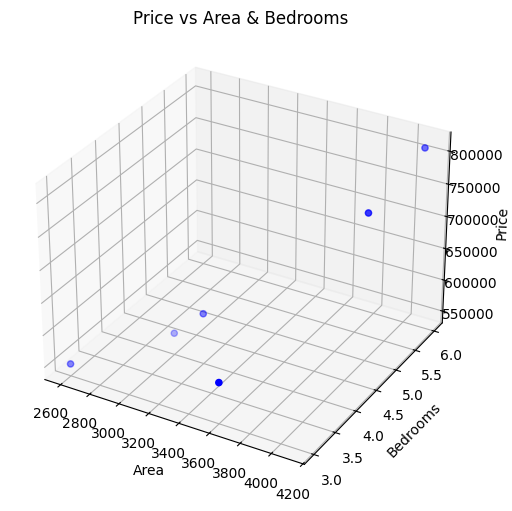

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['area'], df['bedrooms'], y, c='blue', marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.title("Price vs Area & Bedrooms")
plt.show()
